In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from acquire import get_sales_items_stores, get_opsd
from matplotlib.dates import DateFormatter

In [2]:
heb_df = get_sales_items_stores()

heb_df.info()
heb_df.head()

Reading from CSV file...
Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 104.5+ MB


,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [3]:
(heb_df.item_upc12 != heb_df.item_upc14).sum()

0

In [4]:
heb_df.drop(columns= ['item_upc14'], inplace=True)

In [6]:
heb_df.sale_date = heb_df.sale_date.str.rstrip('00:00:00 GMT')
heb_df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [7]:
heb_df.info()
heb_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 97.5+ MB


,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [9]:
heb_df.sale_date = pd.to_datetime(heb_df.sale_date)



In [10]:
heb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_id        913000 non-null  int64         
 1   sale_amount    913000 non-null  float64       
 2   sale_date      913000 non-null  datetime64[ns]
 3   sale_id        913000 non-null  int64         
 4   store_id       913000 non-null  int64         
 5   item_brand     913000 non-null  object        
 6   item_name      913000 non-null  object        
 7   item_price     913000 non-null  float64       
 8   item_upc12     913000 non-null  int64         
 9   store_address  913000 non-null  object        
 10  store_city     913000 non-null  object        
 11  store_state    913000 non-null  object        
 12  store_zipcode  913000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 97.5+ MB


In [11]:
heb_df = heb_df.set_index('sale_date')


In [12]:
heb_df.info()
heb_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_state    913000 non-null  object 
 11  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.6+ MB


,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-02,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-03,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-04,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-05,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [13]:
print(heb_df.index.max(), heb_df.index.min())

2017-12-31 00:00:00 2013-01-01 00:00:00


In [16]:
heb_df['sale_total'] = heb_df.sale_amount * heb_df.item_price
heb_df['month'] = heb_df.index.strftime('%m-%b')
heb_df['day'] = heb_df.index.strftime('%w-%a')

heb_df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,store_address,store_city,store_state,store_zipcode,sale_total,month,day
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,10.92,01-Jan,2-Tue
2013-01-02,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,9.24,01-Jan,3-Wed
2013-01-03,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,11.76,01-Jan,4-Thu
2013-01-04,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,10.92,01-Jan,5-Fri
2013-01-05,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,8.40,01-Jan,6-Sat


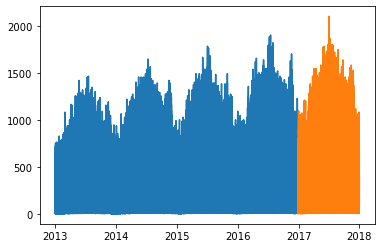

In [18]:
train = heb_df[:'2017-01-01']
test= heb_df['2016-12-31':]
plt.plot(train.index, train.sale_total)
plt.plot(test.index, test.sale_total)

<AxesSubplot:ylabel='Frequency'>

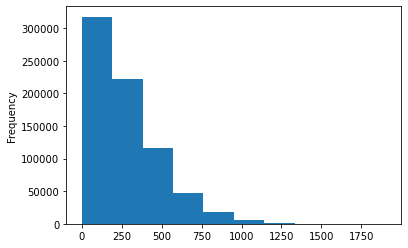

In [19]:
y = train.sale_total
y.plot.hist()

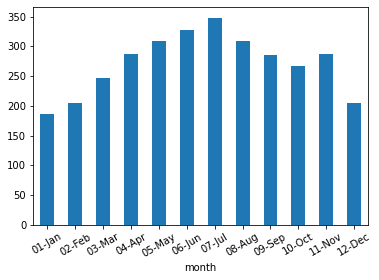

In [20]:
ax = train.groupby(train.month).sale_total.mean().plot.bar()
ax.tick_params('x', rotation=30)

<AxesSubplot:xlabel='day'>

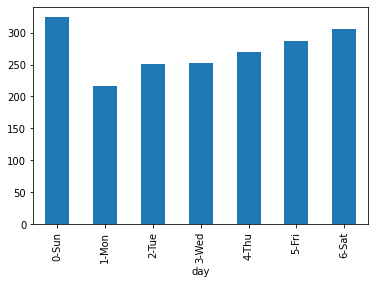

In [21]:
train.groupby(train.day).sale_total.mean().plot.bar()

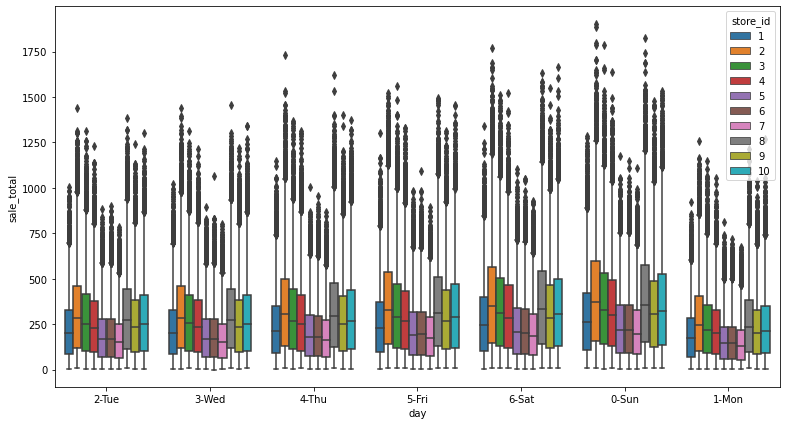

In [22]:
plt.figure(figsize=(13,7))
sns.boxplot(data=train, x='day', y='sale_total', hue= 'store_id')
plt.savefig('heb_store_boxplot.png')

In [31]:
y.head()

sale_date
2013-01-01    10.92
2013-01-02     9.24
2013-01-03    11.76
2013-01-04    10.92
2013-01-05     8.40
Name: sale_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

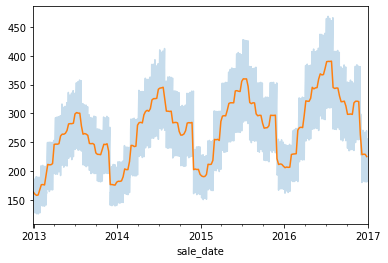

In [23]:
y.resample('D').mean().plot(alpha=.25)
y.resample('W').mean().plot()

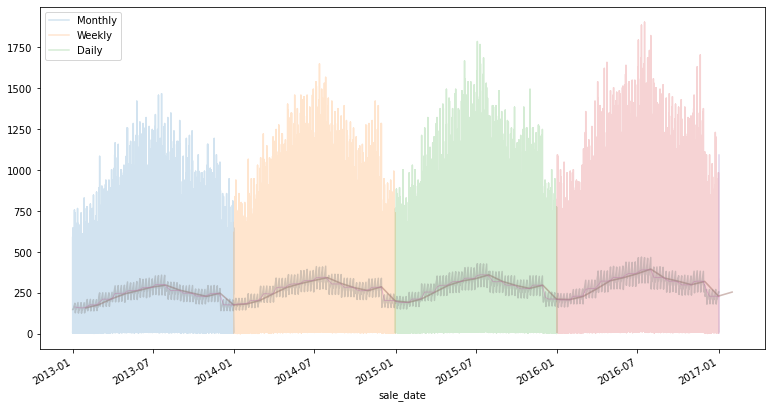

In [89]:
plt.figure(figsize= (13,7))
y.resample('Y').plot(alpha= .2)
y.resample('M').mean().plot(alpha=.4, label= 'Monthly', linewidth= 1.6)
y.resample('W').mean().plot(alpha=.5, label= 'Weekly', linewidth=.8)
y.resample('D').mean().plot(alpha=.35, label= 'Daily')

plt.legend(['Monthly', 'Weekly', 'Daily'])
plt.savefig('heb_mean_sale_totals.jpeg')


<AxesSubplot:title={'center':'Avg week-to-week sales totals'}, xlabel='sale_date'>

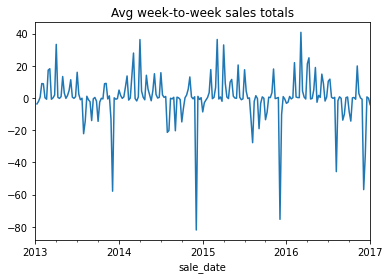

In [26]:
y.resample('W').mean().diff().plot(title='Avg week-to-week sales totals')

<AxesSubplot:title={'center':'Seasonal sales'}, xlabel='sale_date'>

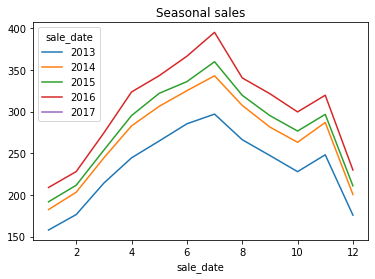

In [27]:
#y.groupby([y.index.year, y.index.month]).mean().unstack().plot(title='Seasonal sales')
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal sales')

Text(0.5, 1.0, 'Lag plot with Lag=1')

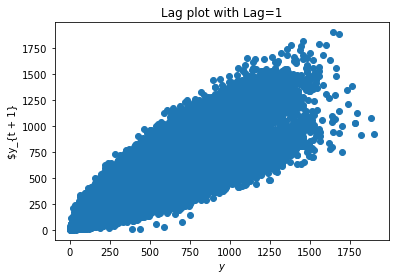

In [28]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}')
plt.title('Lag plot with Lag=1')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

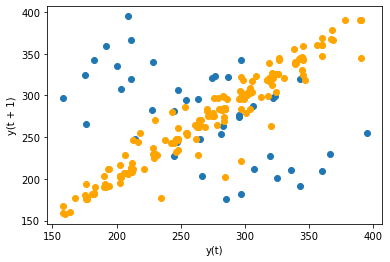

In [80]:
pd.plotting.lag_plot(y.resample('M').mean(), lag=6)
pd.plotting.lag_plot(y.resample('W').mean(), lag=1, c='orange')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

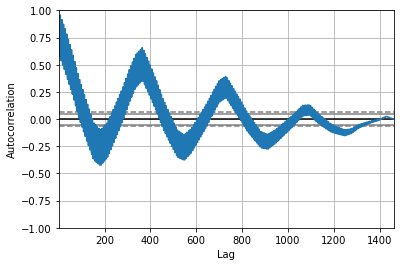

In [30]:
pd.plotting.autocorrelation_plot(y.resample('D').mean())

In [31]:
result = sm.tsa.seasonal_decompose(y.resample('M').mean())
decomp = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomp.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-31,157.894723,NaN,-79.342243,NaN
2013-02-28,176.411855,NaN,-61.821313,NaN
2013-03-31,214.181650,NaN,-20.606267,NaN
2013-04-30,244.460082,NaN,20.302738,NaN
2013-05-31,264.663123,NaN,41.539603,NaN


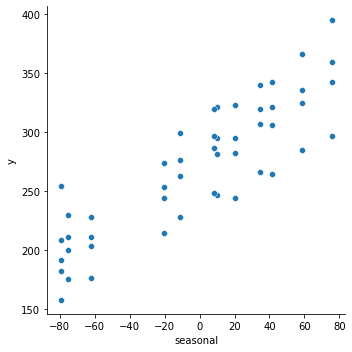

In [32]:
sns.relplot(data=decomp, x='seasonal', y='y')

<AxesSubplot:xlabel='sale_date'>

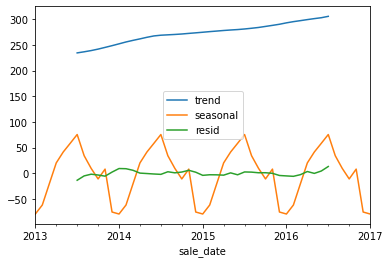

In [34]:
decomp.iloc[:, 1:].plot()

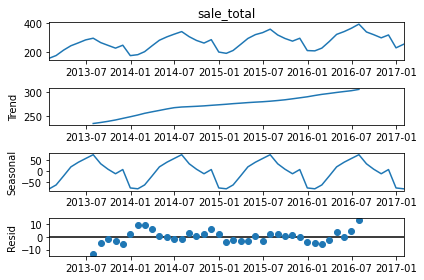

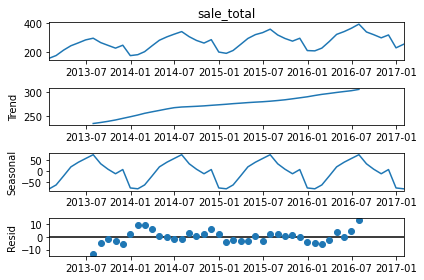

In [36]:
result.plot()

In [39]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731000 entries, 2013-01-01 to 2017-01-01
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        731000 non-null  int64  
 1   sale_amount    731000 non-null  float64
 2   sale_id        731000 non-null  int64  
 3   store_id       731000 non-null  int64  
 4   item_brand     731000 non-null  object 
 5   item_name      731000 non-null  object 
 6   item_price     731000 non-null  float64
 7   item_upc12     731000 non-null  int64  
 8   store_address  731000 non-null  object 
 9   store_city     731000 non-null  object 
 10  store_state    731000 non-null  object 
 11  store_zipcode  731000 non-null  object 
 12  sale_total     731000 non-null  float64
 13  month          731000 non-null  object 
 14  day            731000 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 89.2+ MB


,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,store_address,store_city,store_state,store_zipcode,sale_total,month,day
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,10.92,01-Jan,2-Tue
2013-01-02,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,9.24,01-Jan,3-Wed
2013-01-03,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,11.76,01-Jan,4-Thu
2013-01-04,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,10.92,01-Jan,5-Fri
2013-01-05,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,8.40,01-Jan,6-Sat


In [42]:
train.item_name.value_counts()

Riceland American Jazmine Rice                                                                       14620
Sundown Naturals Essential Electrolytes Tropical Punch Watermelon And Fruit Punch Gummies - 60 Ct    14620
Guava                                                                                                14620
Heinz Tomato Ketchup - 2 Ct                                                                          14620
Petmate Booda Bones Steak Bacon & Chicken Flavors - 9 Ct                                             14620
Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Light Chai - 22 Ct                                      14620
Barefoot Pinot Grigio  187                                                                           14620
Tomy The First Years Gumdrop Orthodontic Pacifiers 6m+ - 2ct                                         14620
Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct                             14620
Natures Way Forskohlii - 60 Ct       

In [43]:
train_cont_vars = train.select_dtypes(include=np.float64)

train_cont_vars.head()

,sale_amount,item_price,sale_total
sale_date,,,
2013-01-01,13.0,0.84,10.92
2013-01-02,11.0,0.84,9.24
2013-01-03,14.0,0.84,11.76
2013-01-04,13.0,0.84,10.92
2013-01-05,10.0,0.84,8.40


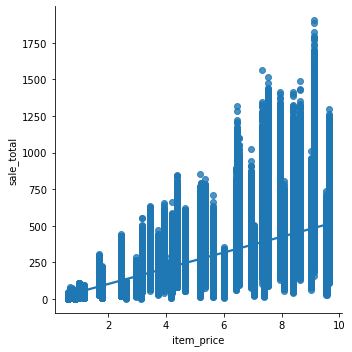

In [88]:
sns.lmplot(data=train_cont_vars, x='item_price', y='sale_total')

<AxesSubplot:xlabel='item_name'>

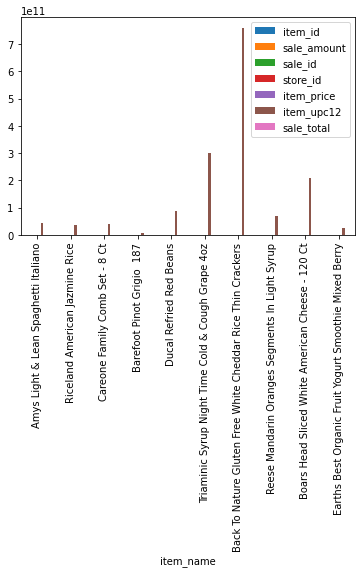

In [86]:
train.groupby('item_name').mean().sort_values(by= 'sale_total').head(10).plot.bar()
